# Sliding window analysis

#### Batch 8 final 

<br>
This notebook contains the first two out of three steps to conduct a sliding window analysis of the FST of aligned Pacific cod loci across the Atlantic cod genome. 

**Procedure is based on:** Hohenlohe PA et al. (2010) PlOsGenetics 6(2):e1000862

**Scripts were borrowed from:** Charlie Waters, Marine Brieuc, Kot Ono

**Programs used:** `R v3.4.0`, `python v2.7`, `genepop v4.2`

<br>
**Steps: **
<br>
[
1. Calculate FST using Genepop
2. Prepare an input file for R with PCod locus ID, ACod chromosome, alignment position, and FST
3. Run Analysis in R
4. Python plots: exploring number / density of markers
5. Plotting Genome Scans in R (basic, with # markers per window, with outlier loci)

]
<br>
x 3: One for east-west comparison, one for within-west FST, one for within-east (coastline only) FST

<br>

#### 3/23/2018
(rerun with final filtered file)

<br>

## 1. Calculate FST

Genepop `Option 6 >> Suboption 2`: Estimating spatial structure: Allele identity (F-statistics) For all population pairs
<br>
I did this with the genepop files: 

1. Two populations: sampling sites split into east (US/CAN) and west (Korea)
2. Two populations: sampling sites of the western group split into regions (west / south , where I have the most samples)
3. Six populations: coastal sampling sites of the eastern group (no Salish Sea)
<br>


### Distribution of FST and parsed file with FST values

**East v. West**

In [4]:
cd ../analyses/SlidingWindow/

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


In [5]:
###################### objects ###############################
myfile = "batch_8_final_filtered_aligned_genepop_eastwest.txt.ST2" # genepop output
newfile = "batch_8_final_filtered_aligned_genepop_eastwest_parsed.txt" # parsed output from this script
###############################################################

# open file and read all lines into a string 
infile = open(myfile, "r")
lines = infile.read()
infile.close()

# split the string into a list, with each element starting with "Locus:"
linelist = lines.split("Locus:")[1:]

# save the locus name and FST from each element into a dictionary
fst_dict = {}
for i in linelist:
    ilist = i.strip().split()
    fst_dict[ilist[0].split("_")[0]] = ilist[5]

# write to output file
outfile = open(newfile, "w")
outfile.write("Locus\tFst\n")

fst_list = []
fst_NA = 0
for i in fst_dict.keys():
    if fst_dict[i] == "-":
        fst_NA += 1
    else:
        fst_list.append(fst_dict[i])
        outfile.write(i + "\t" + fst_dict[i] + "\n")
outfile.close()

print "Fst was not calculated for ", fst_NA, " loci."

Fst was not calculated for  0  loci.


Verify number of loci parsed:

In [6]:
len(fst_dict.keys())

4286

Plot

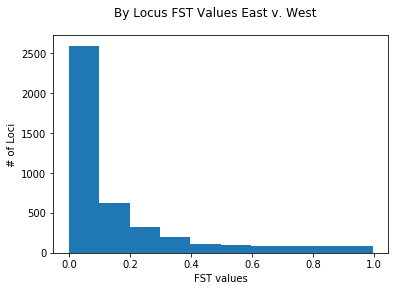

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst_list])
plt.suptitle("By Locus FST Values East v. West")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [8]:
plt.close()

** West **

In [9]:
###################### objects ###############################
myfile = "batch_8_final_filtered_aligned_genepop_west.txt.ST2" # genepop output
newfile = "batch_8_final_filtered_aligned_genepop_west_parsed.txt" # parsed output from this script
###############################################################

# open file and read all lines into a string 
infile = open(myfile, "r")
lines = infile.read()
infile.close()

# split the string into a list, with each element starting with "Locus:"
linelist = lines.split("Locus:")[1:]

# save the locus name and FST from each element into a dictionary
fst_dict = {}
for i in linelist:
    ilist = i.strip().split()
    fst_dict[ilist[0].split("_")[0]] = ilist[5]

# write to output file
outfile = open(newfile, "w")
outfile.write("Locus\tFst\n")

fst_list = []
fst_NA = 0
for i in fst_dict.keys():
    if fst_dict[i] == "-":
        fst_NA += 1
    else:
        fst_list.append(fst_dict[i])
        outfile.write(i + "\t" + fst_dict[i] + "\n")
outfile.close()

print "Fst was not calculated for ", fst_NA, " loci."

Fst was not calculated for  1127  loci.


Verify number of loci parsed:

In [10]:
len(fst_dict.keys())

4286

Plot

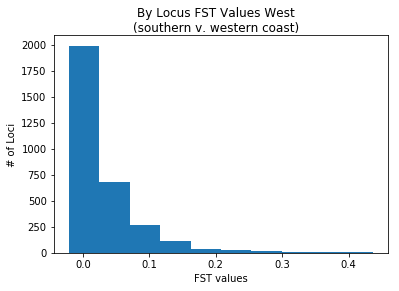

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst_list])
plt.suptitle("By Locus FST Values West\n(southern v. western coast)")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [12]:
plt.close()

#### East, Coastal

Global Fst, using Genepop `option 6 >> suboption 1`

<br>
<br>

## 2. Create Input file for R

There are two steps here. First, I need to parse out the alignment information from my filtered .sam file. Then I need to concatenate that file with my parsed FST file, keeping only the loci where FST is available. 

<br>
### Parse Alignment


In [13]:
###################### objects ###############################
myfile = "../alignment/batch_8_final_filtered_gadMor2LG_filteredMQ.sam" # genepop output
newfile = "batch_8_final_filtered_alignments_summary.txt" # parsed output from this script
###############################################################

infile = open(myfile, "r")
outfile = open(newfile, "w")
outfile.write("Locus\tLG\tPosition\n")
for line in infile:
    linelist = line.strip().split()
    new_list = [linelist[0].strip("Locus"), linelist[2], linelist[3]]
    outfile.write("\t".join(new_list) + "\n")
infile.close()
outfile.close()

### Join Files

I did this step in RStudio. It is the beginning of the Sliding Window Analysis R script (generic version [here](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_MF.R)).

<br>
<br>

## 3. Run sliding window analysis in R


I used the following R scripts and input files: 

East v. West [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_EastWest_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/EastvWest/batch_8_final_filtered_SWA_input_eastwest.txt)
<br>
West [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_West_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/West/batch_8_final_filtered_SWA_input_west_2reg.txt)
<br>
East [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_East_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/West/batch_8_final_filtered_SWA_input_east.txt)
<br>
*Note that input files were sorted by chromosome and position within the sliding window analysis script.*

<br>
#### more on sliding window analysis:

Sliding window analysis uses a "kernel-smoothing moving average." The width of the window and the weight of each point are defined using a Gaussian function (`exp(-(-p-c)^2/2(sigma^2)`). Bootstrap resampling is used to assign significance values to moving average values of FST (or whatever population-level statistic you are working with).
<br>

There are three variable parameters that need to be defined: 

1. Sigma - the variance in the Gaussian function. The weighted average window is truncated at `3*sigma` for computational efficiency. Hohenlohe et al. (2010) used a sigma = 150 kb
2. Step size - how many base pairs the window moves over before it repeats the calculation of a weighted average. In the R code, "divisions" is specified instead of step side. Hohenlohe et al. (2010) used a step size = 100 kb. *with a step size of 100kb, and about 20 million base pairs per linkage group, Hohenlohe et al. (2010) end up with approximately 200 divisions.*
3. Replicates used in bootstrapping - Hohenlohe et al. (2010) tested out 100, 1000, 10000, 1 million, 10 million. Charlie uses 1 million. 


<br>


For my first final through of the analysis, I'm going to use the following parameters for the R code:
1. Sigma - 250kb
2. Divisions - 150
3. Bootstrap replicates - 100,000 

<br>
#### 150 divisions = what step size per linkage group?




In [1]:
cd ../ACod_reference/

/mnt/hgfs/PCod-Compare-repo/ACod_reference


In [7]:
########### objects #############
infile = open("lg_scaff_lengths.txt", "r")
step_sizes = []
#################################

infile.readline() # header
line = infile.readline()
while line.startswith("LG"):
    length = int(line.strip().split()[1])
    step_sizes.append(float(length)/float(150)/float(1000))
    line = infile.readline()
infile.close()

print "Step Sizes in Kilobases"
step_sizes

Step Sizes in Kilobases


[150.06869333333333,
 160.99422,
 155.09769333333332,
 144.90468666666666,
 169.21542666666667,
 178.6459066666667,
 208.21918,
 169.76413333333332,
 160.49370000000002,
 232.03548,
 196.34036666666668,
 160.36270666666667,
 188.69301333333334,
 150.3617,
 141.17506666666668,
 195.31288,
 177.31972666666667,
 207.28828666666666,
 127.66138000000001,
 168.69537333333332,
 192.95311999999998,
 181.98649333333336,
 171.17823333333334]


<br>
<br>
<br>



## 4. Markers per LG

How many markers were aligned to each linkage group?

** East v. West **

In [3]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [8]:
cd ../analyses/SlidingWindow/

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


In [10]:
###################### objects ###############################
myfile = "batch_8_final_filtered_aligned_SWA_input_eastwest_globalFst_sorted.txt"
###############################################################

# read all lines in infile into object
infile = open(myfile, "r")
lines = infile.readlines()
infile.close()

# get chromosome numbers
chrom_list = []
for line in lines[1:]:
    # note that all chromosome names start with "LG"
    newchrom = line.split("LG")[1].split("\t")[0]
    if newchrom not in chrom_list:
        chrom_list.append(newchrom)

# count occurrance
counts = []
all_lines = ",".join(lines)
for chrom in chrom_list:
    n_markers = all_lines.count("LG" + chrom)
    counts.append(n_markers)

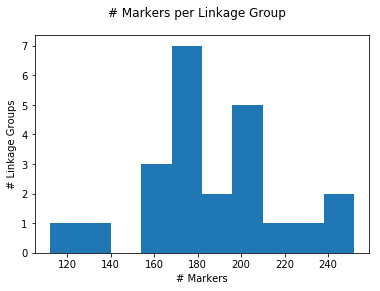

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in counts])
plt.suptitle("# Markers per Linkage Group")
plt.xlabel("# Markers")
plt.ylabel("# Linkage Groups")
plt.show()

In [12]:
plt.close()

<br>
<br>
** West**

In [13]:
###################### objects ###############################
myfile = "West/batch_8_SWA_input_west_sorted.txt"
###############################################################

# read all lines in infile into object
infile = open(myfile, "r")
lines = infile.readlines()
infile.close()

# get chromosome numbers
chrom_list = []
for line in lines[1:]:
    # note that all chromosome names start with "LG"
    newchrom = line.split("LG")[1].split("\t")[0]
    if newchrom not in chrom_list:
        chrom_list.append(newchrom)

# count occurrance
counts = []
all_lines = ",".join(lines)
for chrom in chrom_list:
    n_markers = all_lines.count("LG" + chrom)
    counts.append(n_markers)

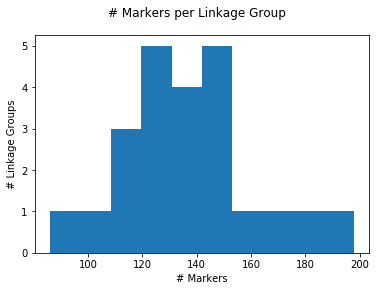

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in counts])
plt.suptitle("# Markers per Linkage Group")
plt.xlabel("# Markers")
plt.ylabel("# Linkage Groups")
plt.show()

In [15]:
plt.close()

<br>
<br>
** East**

In [16]:
###################### objects ###############################
myfile = "East/batch_8_SWA_input_east_sorted.txt"
###############################################################

# read all lines in infile into object
infile = open(myfile, "r")
lines = infile.readlines()
infile.close()

# get chromosome numbers
chrom_list = []
for line in lines[1:]:
    # note that all chromosome names start with "LG"
    newchrom = line.split("LG")[1].split("\t")[0]
    if newchrom not in chrom_list:
        chrom_list.append(newchrom)

# count occurrance
counts = []
all_lines = ",".join(lines)
for chrom in chrom_list:
    n_markers = all_lines.count("LG" + chrom)
    counts.append(n_markers)

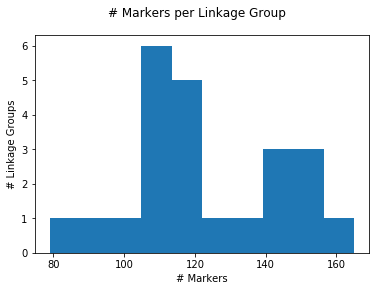

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in counts])
plt.suptitle("# Markers per Linkage Group")
plt.xlabel("# Markers")
plt.ylabel("# Linkage Groups")
plt.show()

In [18]:
plt.close()

<br>
<br>
______________________________

## Sliding Window Analysis Across Genome

The first sliding window analysis was run on location data by linkage group. I also wanted to run a sliding window analysis across the entire genome, rather than separated by linkage group. In order to do this, I [calculated the cumulative position](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/calc_cumulative_position.xlsx) of each locus using the total lengths of each linkage group.

I then re-ran sliding window analysis for all comparisons. 

I used **3450 divisions** (150 divisions per linkage group) and the same window size as above, **250kb**.



East v. West [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_EastWest_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/EastvWest/batch_8_final_filtered_SWA_input_eastwest_sorted_cpos.txt)
<br>
West [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_West_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/West/batch_8_final_filtered_SWA_input_west_2reg_sorted_cpos.txt)

<br>
<br>
<br>
________________________


#### 4/4/2018


## Sliding Window Analysis Rerun: East v. West

Genepop `Option 6 >> Suboption 1`: Estimating spatial structure: Allele identity (F-statistics) For all populations [global Fst]
<br>
I did this with the genepop files: 

1. Twelve populations: all sampling sites across east (US/CAN coastline) and west (Korea)


*This created null Fst values that I did not have in my original pairwise calculations. The R script that I ran had to filter out these null values, giving me a total of 4,231 loci instead of 4,286*


### Distribution of FST and parsed file with FST values

I copied over the chart at the end of the genepop file into excel, and then moved over only the columns with locus name and Fst into a text file.


In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../analyses/SlidingWindow/

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


Loci that were missing Fst values (out of 4,862):
55


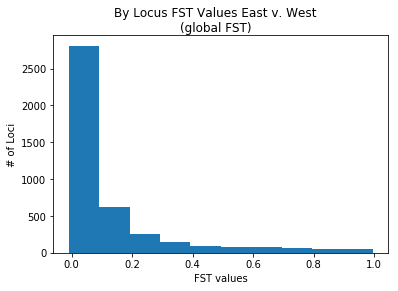

In [5]:
############ objects #############
infile = open("EastvWest/batch_8_final_filtered_aligned_genepop_eastwest_globalFst_parsed.txt")
###################################

infile.readline() # header

fst = []
count = 0
for line in infile:
    newfst = line.strip().split()[1]
    if newfst != "-":
        fst.append(newfst)
    else:
        count += 1
infile.close()
print "Loci that were missing Fst values (out of 4,862):"
print count

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst])
plt.suptitle("By Locus FST Values East v. West\n(global FST)")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [6]:
plt.close()

### 2. Create input file for R

I already created the alignment summary file that I need to join to my Fst file. 

I did the joining step in RStudio. It is the beginning of the Sliding Window Analysis R script (generic version [here](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_MF.R)).

<br>
<br>

### 3. Run analysis in R


I used the following R scripts and input files: 

East v. West [R Script](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/SlidingWindow_EastWest_globalFST_MF.R), [Input File](https://github.com/mfisher5/PCod-Compare-repo/blob/master/analyses/SlidingWindow/EastvWest/batch_8_final_filtered_aligned_SWA_input_eastwest_globalFst_sorted.txt)





### 4. Markers per LG

How many markers were aligned to each linkage group?

** East v. West **

In [19]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow'

In [20]:
###################### objects ###############################
myfile = "batch_8_final_filtered_aligned_SWA_input_eastwest_globalFst_sorted.txt"
###############################################################

# read all lines in infile into object
infile = open(myfile, "r")
lines = infile.readlines()
infile.close()

# get chromosome numbers
chrom_list = []
for line in lines[1:]:
    # note that all chromosome names start with "LG"
    newchrom = line.split("LG")[1].split("\t")[0]
    if newchrom not in chrom_list:
        chrom_list.append(newchrom)

# count occurrance
counts = []
all_lines = ",".join(lines)
for chrom in chrom_list:
    n_markers = all_lines.count("LG" + chrom)
    counts.append(n_markers)

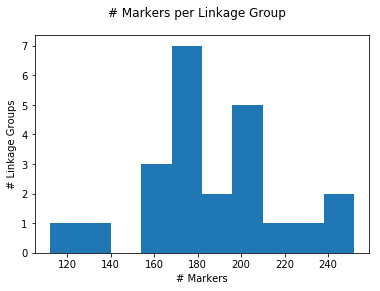

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in counts])
plt.suptitle("# Markers per Linkage Group")
plt.xlabel("# Markers")
plt.ylabel("# Linkage Groups")
plt.show()

In [22]:
plt.close()

<br>
<br>
<br>
________________________


#### 4/4/2018


## Sliding Window Analysis Rerun: West

Genepop `Option 6 >> Suboption 1`: Estimating spatial structure: Allele identity (F-statistics) For all populations [global Fst]
<br>
I did this with the genepop files: 

1. Seven populations: all sampling sites along western and southern coastline (JB one site, GE two sites)


*This created null Fst values that I did not have in my original pairwise calculations. I filtered these out by hand in excel, giving me 3,414 loci instead of 4,286*


### Distribution of FST and parsed file with FST values

I copied over the chart at the end of the genepop file into excel, and then moved over only the columns with locus name and Fst into a text file.


In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../analyses/SlidingWindow/

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


Loci that were missing Fst values (out of 4,862):
0


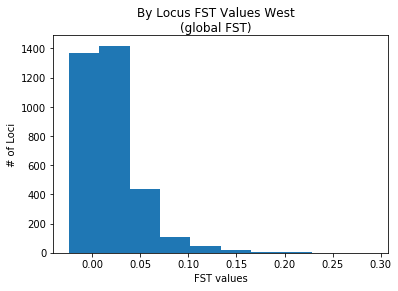

In [5]:
############ objects #############
infile = open("West/batch_8_final_filtered_aligned_genepop_west_parsed_globalFst.txt")
###################################

infile.readline() # header

fst = []
count = 0
for line in infile:
    newfst = line.strip().split()[1]
    if newfst != "-":
        fst.append(newfst)
    else:
        count += 1
infile.close()
print "Loci that were missing Fst values (out of 4,862):"
print count

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst])
plt.suptitle("By Locus FST Values West\n(global FST)")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [6]:
plt.close()